In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import os
import cv2

In [2]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib

In [5]:
data_dir=pathlib.Path(data_dir)

In [6]:
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
c=len(list(data_dir.glob('*/*.jpg')))
c

3670

In [8]:
dandelion=list(data_dir.glob('dandelion/*.jpg'))


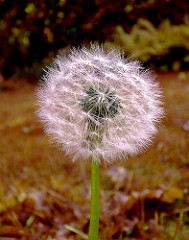

In [9]:
PIL.Image.open(dandelion[100])

In [10]:
flower_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*'))
}
flower_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [11]:
flower_image_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [12]:
img=cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
x,y=[],[]
for flower_name,images in flower_image_dict.items():
   for image in images:
      img=cv2.imread(str(image))
      resized_img=cv2.resize(img,(180,180))
      x.append(resized_img)
      y.append(flower_label_dict[flower_name])

In [15]:
type(x)

list

In [16]:
x=np.array(x)
y=np.array(y)
x.shape,y.shape

((3670, 180, 180, 3), (3670,))

In [17]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [18]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2752, 180, 180, 3), (2752,), (918, 180, 180, 3), (918,))

In [19]:
x_train=x_train/255

In [20]:
x_test=x_test/255

In [21]:
num_classes = 5
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])            

In [22]:
history=model.fit(x_train, y_train, epochs=5) 

Epoch 1/5
86/86 [==============================] - 51s 577ms/step - loss: 1.3766 - accuracy: 0.4164
Epoch 2/5
86/86 [==============================] - 52s 608ms/step - loss: 1.0453 - accuracy: 0.5799
Epoch 3/5
86/86 [==============================] - 49s 569ms/step - loss: 0.8514 - accuracy: 0.6748
Epoch 4/5
86/86 [==============================] - 47s 548ms/step - loss: 0.6976 - accuracy: 0.7362
Epoch 5/5
86/86 [==============================] - 47s 546ms/step - loss: 0.4779 - accuracy: 0.8227


In [23]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 4s 138ms/step - loss: 0.9217 - accuracy: 0.6612


[0.9216619729995728, 0.6612200140953064]

In [24]:
##we can also do by including the batchsize.
model.fit(x_train,y_train,batch_size=16,epochs=5)

Epoch 1/5
172/172 [==============================] - 57s 323ms/step - loss: 0.4247 - accuracy: 0.8499
Epoch 2/5
172/172 [==============================] - 55s 322ms/step - loss: 0.2032 - accuracy: 0.9317
Epoch 3/5
172/172 [==============================] - 52s 302ms/step - loss: 0.1052 - accuracy: 0.9677
Epoch 4/5
172/172 [==============================] - 56s 326ms/step - loss: 0.0839 - accuracy: 0.9738
Epoch 5/5
172/172 [==============================] - 53s 311ms/step - loss: 0.0504 - accuracy: 0.9869


In [25]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 4s 139ms/step - loss: 1.7359 - accuracy: 0.6481


[1.7358509302139282, 0.6481481194496155]

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
y_pred=model.predict(x_test)

29/29 [==============================] - 4s 128ms/step


In [37]:
y_pred_classified=[np.argmax(ele) for ele in y_pred]

In [38]:
y_pred_classified=np.array(y_pred_classified)

In [39]:
y_test.shape,y_pred_classified.shape

((918,), (918,))

In [40]:
print("classification report:  \n" ,classification_report(y_test,y_pred_classified))

classification report:  
               precision    recall  f1-score   support

           0       0.61      0.49      0.54       170
           1       0.54      0.84      0.65       153
           2       0.75      0.70      0.72       208
           3       0.74      0.72      0.73       169
           4       0.63      0.54      0.58       218

    accuracy                           0.65       918
   macro avg       0.65      0.66      0.65       918
weighted avg       0.66      0.65      0.65       918



In [44]:
y_test[10]

4

In [43]:
y_pred_classified[10]

4

In [84]:
data_augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(1),
    keras.layers.experimental.preprocessing.RandomRotation(1),

])

(-0.5, 179.5, 179.5, -0.5)

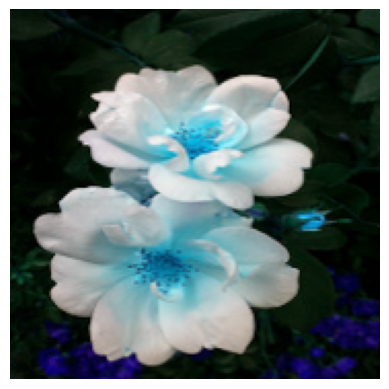

In [73]:
plt.imshow(x[0])
plt.axis('off')

(-0.5, 179.5, 179.5, -0.5)

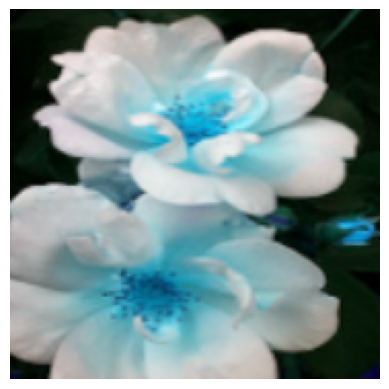

In [74]:
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))
plt.axis('off')

In [77]:
data_augmentation_rotate=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(1),
])

(-0.5, 179.5, 179.5, -0.5)

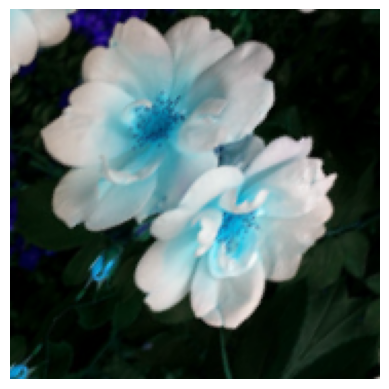

In [78]:
plt.imshow(data_augmentation_rotate(x)[0].numpy().astype('uint8'))
plt.axis('off')

In [85]:
num_classes = 5
model = Sequential([
    data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])   

In [86]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 60s 666ms/step - loss: 1.4011 - accuracy: 0.3801
Epoch 2/5
86/86 [==============================] - 55s 638ms/step - loss: 1.2113 - accuracy: 0.4956
Epoch 3/5
86/86 [==============================] - 55s 637ms/step - loss: 1.1164 - accuracy: 0.5440
Epoch 4/5
86/86 [==============================] - 54s 628ms/step - loss: 1.0632 - accuracy: 0.5738
Epoch 5/5
86/86 [==============================] - 55s 638ms/step - loss: 1.0270 - accuracy: 0.5850


In [87]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 4s 122ms/step - loss: 0.8828 - accuracy: 0.6580


[0.8828454613685608, 0.657952070236206]